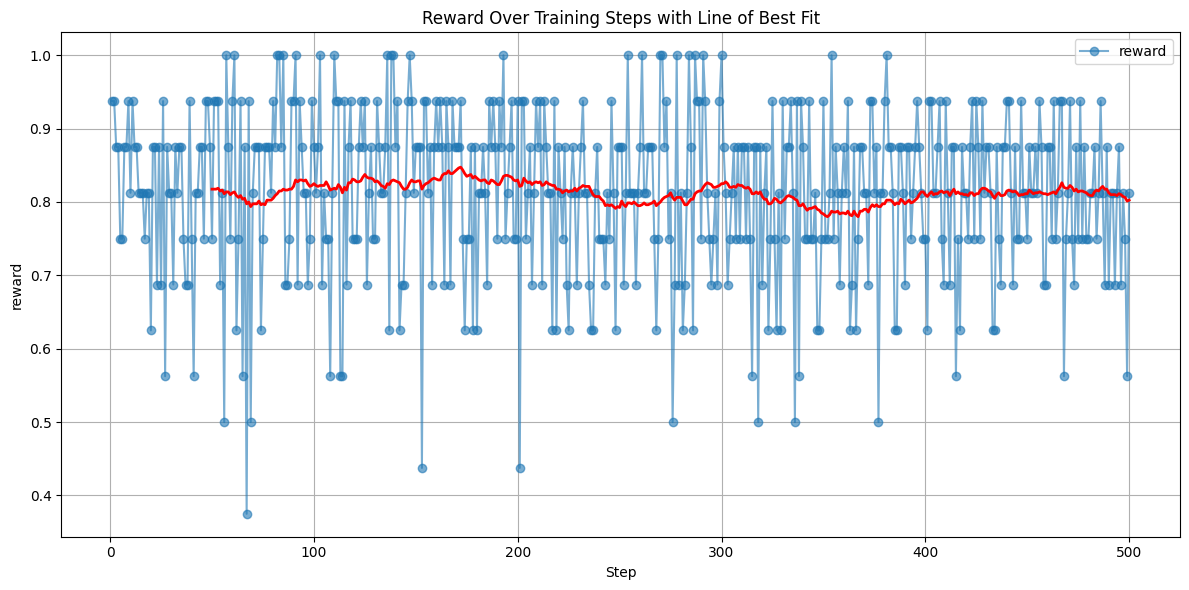

At step 2000, the reward is 0.7225823383293537


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json


def create_graph(model_path: str, reward_name: str, step: int):
    data = json.load(open(f"{model_path}/checkpoint-{step}/trainer_state.json"))
    df = pd.DataFrame(data["log_history"])

    y = df[reward_name]
    x = "step"

    z = np.polyfit(df[x], y, 1)
    p = np.poly1d(z)

    moving_average = df[reward_name].rolling(window=50).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(df["step"], y, label=reward_name, marker="o", linestyle="-", alpha=0.6)
    plt.plot(df["step"], moving_average, color="red", linewidth=2)
    plt.title("Reward Over Training Steps with Line of Best Fit")
    plt.xlabel("Step")
    plt.ylabel(reward_name)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return p


# ============================================================ #

MDOEL_PATH = "../models/beans003-1.5B-GRPO"
FUNCS = [
    "reward",
    "rewards/beans_reward_func",
    "completion_length",
]

p = create_graph(MDOEL_PATH, FUNCS[0], 500)

predict_step = 2000
print(f"At step {predict_step}, the reward is {p(predict_step)}")